In [31]:
import pandas as pd
import numpy as np

from constants import numeric_columns as num_cols


df = pd.read_csv('dm1_dataset_2425_imdb/train.csv')

In [8]:
# possible useful columns for this task:
# rating, startYear, runtimeMinutes, awardWins, numVotes,
# totalImages, totalVideos, totalCredits, criticReviewsTotal,
# awardNominationsExcludeWins, canHaveEpisodes (?), isAdult,
# numRegions, userReviewsTotal, ratingCount,
# genres (as 1henc or as a count?)
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'worstRating', 'bestRating', 'totalImages',
       'totalVideos', 'totalCredits', 'criticReviewsTotal', 'titleType',
       'awardNominationsExcludeWins', 'canHaveEpisodes', 'isRatable',
       'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount',
       'countryOfOrigin', 'genres'],
      dtype='object')

In [55]:
numeric_cols = [
    'rating', 'startYear', 'runtimeMinutes',
    'numVotes', 'totalImages', 
    'totalVideos', 'totalCredits', 'criticReviewsTotal',
    'canHaveEpisodes', 'isAdult',
    'numRegions', 'userReviewsTotal', 'ratingCount',
    # 'awardNominationsExcludeWins', 'awardWins', 'totalNominations'
]

In [29]:
df['rating'].unique()

array(['(7, 8]', '(5, 6]', '(8, 9]', '(6, 7]', '(2, 3]', '(4, 5]',
       '(9, 10]', '(3, 4]', '(0, 1]', '(1, 2]'], dtype=object)

In [32]:
# swaps the rating column to contain only the integer values of the higher bounds
df['rating'] = df['rating'].str.extract(
        r",\s*(\d+)\]"
    ).astype(int)

df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,\N,\N,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,6,1982,\N,\N,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,6,1992,\N,\N,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,6,2021,\N,\N,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,8,2020,2020,80,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16426,Caprices,6,1942,\N,\N,0.0,73,1,10,4,...,movie,0,False,True,0,14,4,73,['FR'],Comedy
16427,Haar Jeet,5,1990,\N,\N,0.0,15,1,10,2,...,movie,0,False,True,0,1,1,15,['IN'],"Action,Drama,Thriller"
16428,Kotigobba 3,6,2021,\N,140,0.0,2560,1,10,39,...,movie,5,False,True,0,5,49,2560,['IN'],"Action,Drama,Romance"
16429,Ator l'invincibile,4,1982,\N,\N,0.0,3011,1,10,52,...,movie,0,False,True,0,26,58,3012,['IT'],"Action,Adventure,Fantasy"


In [33]:
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# train_df[num_cols] = pd.to_numeric(train_df[num_cols], errors='coerce')

df.loc[df['genres'] == r'\N', 'genres'] = np.nan
df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,NaN,NaN,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,6,1982,NaN,NaN,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,6,1992,NaN,NaN,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,8,2020,2020.0,80.0,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16426,Caprices,6,1942,NaN,NaN,0.0,73,1,10,4,...,movie,0,False,True,0,14,4,73,['FR'],Comedy
16427,Haar Jeet,5,1990,NaN,NaN,0.0,15,1,10,2,...,movie,0,False,True,0,1,1,15,['IN'],"Action,Drama,Thriller"
16428,Kotigobba 3,6,2021,NaN,140.0,0.0,2560,1,10,39,...,movie,5,False,True,0,5,49,2560,['IN'],"Action,Drama,Romance"
16429,Ator l'invincibile,4,1982,NaN,NaN,0.0,3011,1,10,52,...,movie,0,False,True,0,26,58,3012,['IT'],"Action,Adventure,Fantasy"


In [34]:
df['awardWins'].fillna(0, inplace=True)
df['totalNominations'] = df['award Wins'] + df['awardNominationsExcludeWins']

/var/folders/68/gjrvx3m51494g9gp2r93j3vh0000gn/T/ipykernel_76289/1033987403.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['awardWins'].fillna(0, inplace=True)


In [35]:
df.groupby('totalNominations').count()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
totalNominations,,,,,,,,,,,,,,,,,,,,,
0.0,13692,13692,13692,581,9431,13692,13692,13692,13692,13692,...,13692,13692,13692,13692,13692,13692,13692,13692,13692,13338
1.0,1016,1016,1016,62,787,1016,1016,1016,1016,1016,...,1016,1016,1016,1016,1016,1016,1016,1016,1016,996
2.0,504,504,504,43,400,504,504,504,504,504,...,504,504,504,504,504,504,504,504,504,501
3.0,252,252,252,24,203,252,252,252,252,252,...,252,252,252,252,252,252,252,252,252,252
4.0,213,213,213,21,164,213,213,213,213,213,...,213,213,213,213,213,213,213,213,213,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152.0,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
160.0,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
170.0,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [48]:
df.loc[df['runtimeMinutes'].isna()].groupby('titleType').count()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,totalNominations
titleType,,,,,,,,,,,,,,,,,,,,,
movie,1225,1225,1225,0,0,1225,1225,1225,1225,1225,...,1225,1225,1225,1225,1225,1225,1225,1225,1120,1225
short,582,582,582,0,0,582,582,582,582,582,...,582,582,582,582,582,582,582,582,582,582
tvEpisode,1469,1469,1469,0,0,1469,1469,1469,1469,1469,...,1469,1469,1469,1469,1469,1469,1469,1469,1468,1469
tvMiniSeries,120,120,120,60,0,120,120,120,120,120,...,120,120,120,120,120,120,120,120,109,120
tvMovie,212,212,212,0,0,212,212,212,212,212,...,212,212,212,212,212,212,212,212,200,212
tvSeries,676,676,676,279,0,676,676,676,676,676,...,676,676,676,676,676,676,676,676,641,676
tvShort,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
tvSpecial,72,72,72,0,0,72,72,72,72,72,...,72,72,72,72,72,72,72,72,60,72
video,238,238,238,0,0,238,238,238,238,238,...,238,238,238,238,238,238,238,238,228,238


In [49]:
df.groupby('titleType').count()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,totalNominations
titleType,,,,,,,,,,,,,,,,,,,,,
movie,5535,5535,5535,0,4310,5535,5535,5535,5535,5535,...,5535,5535,5535,5535,5535,5535,5535,5535,5305,5535
short,2474,2474,2474,0,1892,2474,2474,2474,2474,2474,...,2474,2474,2474,2474,2474,2474,2474,2474,2474,2474
tvEpisode,4698,4698,4698,0,3229,4698,4698,4698,4698,4698,...,4698,4698,4698,4698,4698,4698,4698,4698,4692,4698
tvMiniSeries,224,224,224,121,104,224,224,224,224,224,...,224,224,224,224,224,224,224,224,209,224
tvMovie,868,868,868,0,656,868,868,868,868,868,...,868,868,868,868,868,868,868,868,843,868
tvSeries,1375,1375,1375,693,699,1375,1375,1375,1375,1375,...,1375,1375,1375,1375,1375,1375,1375,1375,1322,1375
tvShort,40,40,40,0,39,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
tvSpecial,166,166,166,0,94,166,166,166,166,166,...,166,166,166,166,166,166,166,166,148,166
video,792,792,792,0,554,792,792,792,792,792,...,792,792,792,792,792,792,792,792,769,792


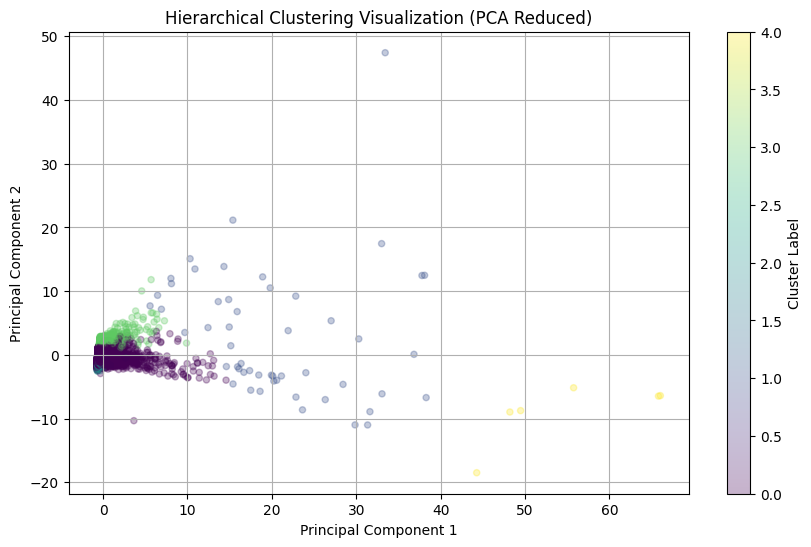

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Select numerical features
# numeric_cols = df.select_dtypes(include=['number']).columns

# decision to drop na: first try, the classes mantain decent
# representation while not having to replace na, possibly inserting
# errors
data = df[numeric_cols].dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply Agglomerative Clustering
n_clusters = 5  # Adjust based on your dataset
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
data['cluster'] = clustering.fit_predict(data_scaled)

# Plot clusters (PCA for visualization if data is high-dimensional)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(
    data_pca[:, 0], data_pca[:, 1], c=data['cluster'],
    cmap='viridis', alpha=0.3, s=20
)
plt.grid()
plt.title("Hierarchical Clustering Visualization (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

# Generate Dendrogram
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()
